In [135]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset

In [136]:
df=pd.read_csv(r'train.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

# Data Cleansing

In [138]:
#check missing value
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


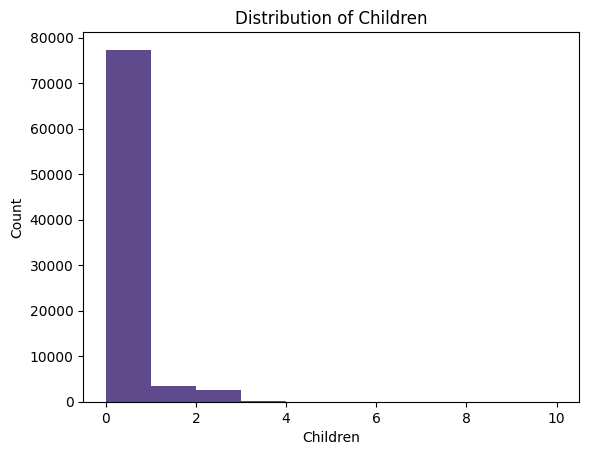

In [139]:

plt.hist(df['children'],color='#5F4B8B')
plt.title('Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

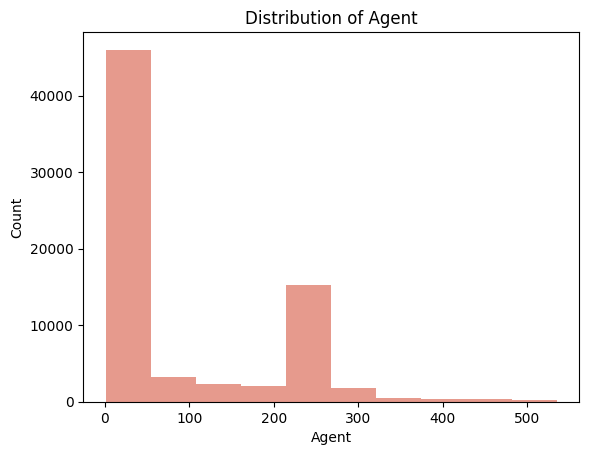

In [140]:
plt.hist(df['agent'],color='#E69A8D')
plt.title('Distribution of Agent')
plt.xlabel('Agent')
plt.ylabel('Count')
plt.show()

In [141]:
#handing missing values
df.drop(['company'],axis='columns',inplace=True)
df.drop(['reservation_status'],axis='columns',inplace=True)
df['children'].fillna(df['children'].median(),inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['agent'].fillna(df['agent'].median(),inplace=True)

In [142]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83293 non-null  object        
 1   is_canceled                     83293 non-null  int64         
 2   lead_time                       83293 non-null  int64         
 3   arrival_date_year               83293 non-null  int64         
 4   arrival_date_month              83293 non-null  object        
 5   arrival_date_week_number        83293 non-null  int64         
 6   arrival_date_day_of_month       83293 non-null  int64         
 7   stays_in_weekend_nights         83293 non-null  int64         
 8   stays_in_week_nights            83293 non-null  int64         
 9   adults                          83293 non-null  int64         
 10  children                        83293 non-null  float64       
 11  ba

In [144]:
df.duplicated().sum()

0